In [520]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# Economic Freedom Data

### https://www.heritage.org/index/

In [521]:
df = pd.read_csv('economic_freedom_index2019_data.csv', encoding = 'latin-1')
df
# maybe gdp per world rank?
# IIRC there's also a happiness ranking so maybe correlate those 2 datasets?

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
5,6,Armenia,Armenia,Europe,47.0,24.0,67.7,57.2,46.3,38.6,...,Armenia,3.0,$28.3,7.5,3.6,"$9,456",18.2,0.9,245.7,53.5
6,7,Australia,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,...,Australia,24.8,"$1,246.5",2.3,2.4,"$50,334",5.6,2.0,"46,368.0",41.6
7,8,Austria,Austria,Europe,31.0,16.0,72.0,84.2,71.3,77.4,...,Austria,8.8,$439.6,2.9,1.3,"$49,869",5.5,2.2,"9,629.6",78.8
8,9,Azerbaijan,Azerbaijan,Asia-Pacific,60.0,13.0,65.4,59.1,53.1,44.7,...,Azerbaijan,9.8,$171.8,0.1,1.2,"$17,492",5.0,13.0,"2,867.0",54.7
9,10,Bahamas,Bahamas,Americas,76.0,15.0,62.9,42.2,46.9,43.7,...,Bahamas,0.4,$11.6,1.3,-0.7,"$31,139",12.6,1.4,927.7,57.2


In [522]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
df = df.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)

In [523]:
df.head()

,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [524]:
df.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

Reseach from the _Kashian Database of Economic Somethingitude_ asserts that `Government Integrity < 25` is considered **CORRUPT** while `> 30` is considered **NOBLE**. (CITATION: google.com/kash)

### Potential Example for Converting Numerical Data into Categorical Discrete Data!

In [525]:
data.columns.unique()

Index(['Region', 'World EFI Rank', 'Regional EFI Rank', 'EFI Score 2019',
       'Property Rights', 'Judical Effectiveness', 'Government Integrity',
       'Tax Burden', 'Govt Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Govt Expenditure % of GDP', 'Country', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)', 'Freedom'],
      dtype='object')

In [526]:
data.replace({ 
    '$40.0 (2015 est.)': '40.0',
    '38,000 ppl.': 0.038,
    '$6.1 CHF (2014 )': '6.1',
    '1,246.5 ': '1246.5',
    '$139,100 (2009 est.)': 139000,
    '$1,700 (2015 est.)': 1700,
    '2.1 (2016)': 2.1
    }, inplace=True
)

In [527]:
data['GDP (Billions, PPP)'] = data['GDP (Billions, PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['GDP per Capita (PPP)'] = data['GDP per Capita (PPP)'].str.strip('$').str.strip(' ').str.replace('[^\w\s]','').fillna(0).astype(float)
data['FDI Inflow (Millions)'] = data['FDI Inflow (Millions)'].str.replace('[^\w\s]','').fillna(0).astype(float)



AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [528]:
data['Property Rights'] = data['Property Rights'].fillna(0).astype(float)
data['Judical Effectiveness'] = data['Judical Effectiveness'].fillna(0).astype(float)
data['Government Integrity'] = data['Government Integrity'].fillna(0).astype(float)
data['Tax Burden'] = data['Tax Burden'].fillna(0).astype(float)
data['Govt Spending'] = data['Govt Spending'].fillna(0).astype(float)
data['Fiscal Health'] = data['Fiscal Health'].fillna(0).astype(float)
data['Business Freedom'] = data['Business Freedom'].fillna(0).astype(float)
data['Labor Freedom'] = data['Labor Freedom'].fillna(0).astype(float)
data['Monetary Freedom'] = data['Monetary Freedom'].fillna(0).astype(float)
data['Trade Freedom'] = data['Trade Freedom'].fillna(0).astype(float)
data['Investment Freedom'] = data['Investment Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Financial Freedom'] = data['Financial Freedom'].fillna(0).astype(float)
data['Tariff Rate (%)'] = data['Tariff Rate (%)'].fillna(0).astype(float)
data['Income Tax Rate (%)'] = data['Income Tax Rate (%)'].fillna(0).astype(float)
data['Corporate Tax Rate (%)'] = data['Corporate Tax Rate (%)'].fillna(0).astype(float)
data['Tax Burden % of GDP'] = data['Tax Burden % of GDP'].fillna(0).astype(float)
data['Govt Expenditure % of GDP'] = data['Govt Expenditure % of GDP'].fillna(0).astype(float)
data['Population (Millions)'] = data['Population (Millions)'].fillna(0).astype(float)
data['GDP Growth Rate (%)'] = data['GDP Growth Rate (%)'].fillna(0).astype(float)
data['5 Year GDP Growth Rate (%)'] = data['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
data['Unemployment (%)'] = data['Unemployment (%)'].fillna(0).astype(float)
data['Inflation (%)'] = data['Inflation (%)'].fillna(0).astype(float)
data['Public Debt (% of GDP)'] = data['Public Debt (% of GDP)'].fillna(0).astype(float)

# data['Public Debt (% of GDP)'].unique()


In [529]:
data.head()

,Region,World EFI Rank,Regional EFI Rank,EFI Score 2019,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom
0,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,...,35.5,696.0,2.5,2.9,1958.0,8.8,5.0,539.0,7.3,0
1,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,...,2.9,360.0,3.9,2.5,12507.0,13.9,2.0,11191.0,71.2,1
2,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,...,41.5,6329.0,2.0,3.1,15237.0,10.0,5.6,12030.0,25.8,0
3,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,...,28.2,1903.0,0.7,2.9,6753.0,8.2,31.7,22545.0,65.3,0
4,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,...,44.1,9202.0,2.9,0.7,20876.0,8.7,25.7,118570.0,52.6,0


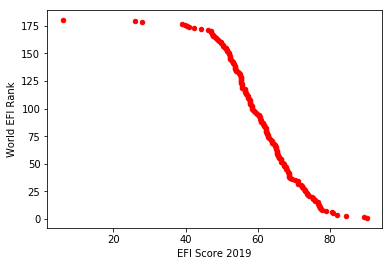

In [530]:
# Since World Ranking is based on EFI Score, these should be deeply correlated
data.plot.scatter(x="EFI Score 2019", y="World EFI Rank", c="red")


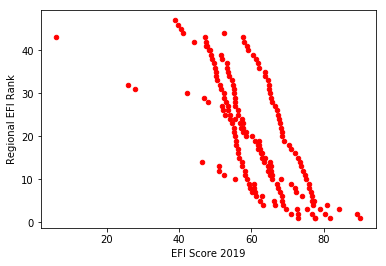

In [531]:
#Same here 
# you can even see the lines for each region
data.plot.scatter(x="EFI Score 2019", y="Regional EFI Rank", c="red")


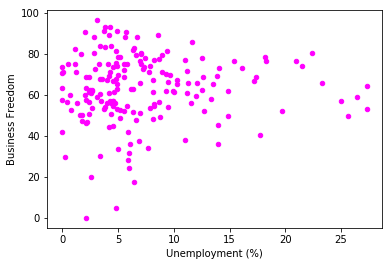

In [532]:
data.plot.scatter(x="Unemployment (%)", y="Business Freedom", c="magenta")


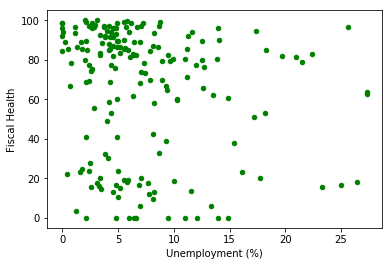

In [533]:
data.plot.scatter(x="Unemployment (%)", y="Fiscal Health", c="green")


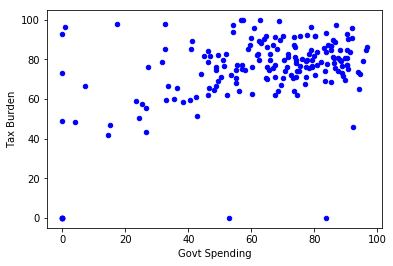

In [534]:
data.plot.scatter(x="Govt Spending", y="Tax Burden", c="blue")


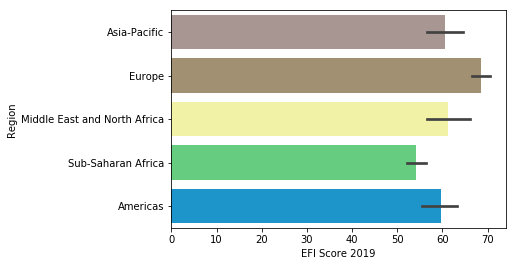

In [535]:
sns.barplot(y='Region', x='EFI Score 2019', palette='terrain_r', data=data)

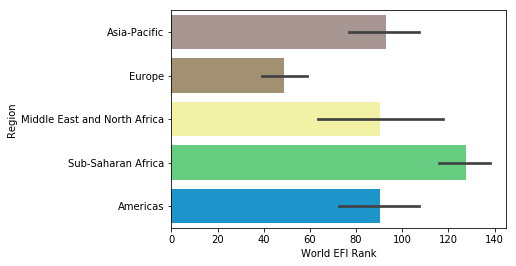

In [536]:
# Higher Rank means lower EFI Score 
sns.barplot(y='Region', x='World EFI Rank', palette='terrain_r', data=data)

In [537]:
df_2018 = pd.read_excel('index2018_data.xls', encoding = 'latin-1')
df_2018.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,2,Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,...,Albania,2.885,34.155,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,3,Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,...,Algeria,40.762,612.513,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,4,Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,...,Angola,27.360,187.261,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,5,Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269


In [538]:
# WEBNAME is the same as Country Name with slight differences; so is Country
# CountryID is basically like index
df_2018 = df_2018.drop(["WEBNAME", "CountryID", "Country Name"], axis = 1)


In [539]:
df_2018.rename(columns={ 
    "2019 Score": "EFI Score 2019",
    "World Rank": "World EFI Rank",
    "Region Rank": "Regional EFI Rank",
    "Gov\'t Spending": "Govt Spending",
    "Gov't Expenditure % of GDP ": "Govt Expenditure % of GDP",
    "Investment Freedom ": "Investment Freedom"
}, inplace=True)

In [540]:
df_2018.replace({ 
    '$15.1 (2015 nominal)': 15.1,
    '$6.1 (2014 nominal)': 6.1,
    '$21.0 (nominal)': 21.0,
    '$5.9 (2015 nominal)': 5.9,
    '$9,600 (estimated)': 9600,
    '249.0 (2014 net)': 249.0,
    '1.0 (2014)': 1.0,
    '1.2 (2014)': 1.2,
    '2.4 (2015)': 2.4
    }, inplace=True
)

In [541]:
df_2018['GDP (Billions, PPP)'] = df_2018['GDP (Billions, PPP)'].fillna(0).astype(float)
df_2018['GDP per Capita (PPP)'] = df_2018['GDP per Capita (PPP)'].fillna(0).astype(float)
df_2018['FDI Inflow (Millions)'] = df_2018['FDI Inflow (Millions)'].fillna(0).astype(float)
df_2018['Property Rights'] = df_2018['Property Rights'].fillna(0).astype(float)
df_2018['Judical Effectiveness'] = df_2018['Judical Effectiveness'].fillna(0).astype(float)
df_2018['Government Integrity'] = df_2018['Government Integrity'].fillna(0).astype(float)
df_2018['Tax Burden'] = df_2018['Tax Burden'].fillna(0).astype(float)
df_2018['Govt Spending'] = df_2018['Govt Spending'].fillna(0).astype(float)
df_2018['Fiscal Health'] = df_2018['Fiscal Health'].fillna(0).astype(float)
df_2018['Business Freedom'] = df_2018['Business Freedom'].fillna(0).astype(float)
df_2018['Labor Freedom'] = df_2018['Labor Freedom'].fillna(0).astype(float)
df_2018['Monetary Freedom'] = df_2018['Monetary Freedom'].fillna(0).astype(float)
df_2018['Trade Freedom'] = df_2018['Trade Freedom'].fillna(0).astype(float)
df_2018['Investment Freedom'] = df_2018['Investment Freedom'].fillna(0).astype(float)
df_2018['Financial Freedom'] = df_2018['Financial Freedom'].fillna(0).astype(float)
df_2018['Tariff Rate (%)'] = df_2018['Tariff Rate (%)'].fillna(0).astype(float)
df_2018['Income Tax Rate (%)'] = df_2018['Income Tax Rate (%)'].fillna(0).astype(float)
df_2018['Corporate Tax Rate (%)'] = df_2018['Corporate Tax Rate (%)'].fillna(0).astype(float)
df_2018['Tax Burden % of GDP'] = df_2018['Tax Burden % of GDP'].fillna(0).astype(float)
df_2018['Govt Expenditure % of GDP'] = df_2018['Govt Expenditure % of GDP'].fillna(0).astype(float)
df_2018['Population (Millions)'] = df_2018['Population (Millions)'].fillna(0).astype(float)
df_2018['GDP Growth Rate (%)'] = df_2018['GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['5 Year GDP Growth Rate (%)'] = df_2018['5 Year GDP Growth Rate (%)'].fillna(0).astype(float)
df_2018['Unemployment (%)'] = df_2018['Unemployment (%)'].fillna(0).astype(float)
df_2018['Inflation (%)'] = df_2018['Inflation (%)'].fillna(0).astype(float)
df_2018['Public Debt (% of GDP)'] = df_2018['Public Debt (% of GDP)'].fillna(0).astype(float)
# df_2018['Unemployment (%)'].unique()

In [542]:
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,Albania,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,Algeria,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,Angola,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269


In [543]:
conditions = [
    (df_2018["2018 Score"] >= 80.0),
    (df_2018["2018 Score"] < 80.0) & (df_2018["2018 Score"] >= 70.0),
    (df_2018["2018 Score"] < 70.0) & (df_2018["2018 Score"] >= 60.0),
    (df_2018["2018 Score"] < 60.0) & (df_2018["2018 Score"] >= 50.0),
    (df_2018["2018 Score"] < 49.9)
]
choices = ["Free", "Mostly Free", "Moderately Free", "Mostly Unfree", "Repressed"]
df_2018["Freedom Level"] = np.select(conditions, choices, default="None")
df_2018.head()

,Region,World EFI Rank,Regional EFI Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Govt Spending,Fiscal Health,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Freedom Level
0,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,98.3,...,33.400,64.081,1.5,4.3882,1918.599,8.540,4.384,99.568966,8.271,Mostly Unfree
1,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,67.5,...,2.885,34.155,2.6,2.0478,11840.228,16.333,1.275,1124.348062,71.536,Moderately Free
2,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,19.2,...,40.762,612.513,3.7,3.5802,15026.461,11.222,6.398,1546.000000,20.356,Repressed
3,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,54.8,...,27.360,187.261,3.0,3.9560,6844.433,6.579,32.378,14363.558989,71.883,Repressed
4,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,52.6,...,43.600,874.072,1.2,-0.1570,20047.489,6.557,58.400,5745.183000,51.269,Mostly Unfree


## Predict 2019 Score Values Using Classifed 2018 Data
## Predict 2019 Classifiers Using Classified 2018 Data 
## Visualize Clustering on Unlabeled 2019 Data

